In [1]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import animation
from scipy.special import *
from scipy.integrate import *
%matplotlib inline

Consideremos una membrana circular (como la de un tambor o una cama elástica) de radio $a$. Describamos la evolución temporal de esta membrana mediante la ecuación de onda, suponiendo la existencia de una función $f(\rho,\phi)$ que describa la geometría de la membrana en un momento inicial en reposo. Sobre la membrana, la rapidez de propagación de las ondas es $\upsilon$.

La ecuación de onda es la siguiente:

### \begin{equation} \nabla^2 \Psi - \frac{1}{\upsilon^2}\frac{\partial^2}{\partial t^2} \Psi = 0 \end{equation}

Ubiquemos nuestros sistema de referencia de modo que la membrana, en su estado de equilibrio, se ubicaría sobre el plano $z=0$, con el centro sobre el origen. Por consiguiente, el dominio del problema es

### \begin{equation} \rho \in [0,a] \hspace{2cm} \wedge \hspace{2cm} \phi \in [0,2\pi[ \hspace{2cm} \wedge \hspace{2cm} t \geq 0 \end{equation}

donde $\rho$ es la coordenada radial, $\phi$ es la coordenada angular y $t$ es la coordenada temporal.

Veamos cuáles son las condiciones de borde de nuestro problema. Debemos tener en cuenta que la ecuación es hiperbólica, de modo que requerimos condiciones de borde tipo Cauchy para obtener una solución única.

Notemos que: (1) la geometría inicial del problema viene descrita por la función $f(\rho,\phi)$; (2) en el borde del tambor no puede haber oscilación; (3) el problema es angularmente simétrico; (4) el sistema parte del reposo.

Es decir,

### (1) $\; \; \Psi(\rho,\phi,0) = f(\rho,\phi)$
### (2) $\; \; \Psi(a,\phi,t) = 0$
### (3) $\; \; \Psi(\rho,\phi,t) = \Psi(\rho,\phi + 2\pi,t)$
### (4) $\; \; \frac{\partial}{\partial t} \Psi(\rho,\phi,0) = 0$

Retornemos a la ecuación de onda. Como esta es lineal, su solución general siempre puede escribirse como una combinación lineal de funciones de la siguiente forma

### \begin{equation} \Psi_{mn} = R(\rho) \Phi(\phi) T(t) \end{equation}

por el método de separación de variables.

En coordenadas polares y usando las funciones de separación, la ecuación de onda toma la siguiente forma

### \begin{equation} \frac{1}{\rho} \frac{\partial}{\partial \rho} \left( \rho \frac{\partial}{\partial \rho} (R \Phi T) \right) + \frac{1}{\rho^2} \frac{\partial^2}{\partial \phi^2} (R \Phi T) = \frac{1}{\upsilon^2} \frac{\partial^2}{\partial t^2} (R \Phi T) \end{equation}

### \begin{equation} \Longrightarrow \frac{1}{\rho R} \frac{d}{d \rho} \left( \rho R' \right) + \frac{1}{\rho^2 \Phi} \Phi'' = \frac{1}{\upsilon^2 T} T'' \end{equation}

Aquí estamos usamos la notación $\frac{d}{d\rho} R \equiv R'$.

Notar que, en la última ecuación, ambos miembros igualados dependen de variables distintas e independientes, lo cual implica que ambos miembros deben ser constantes. Así,

### \begin{equation} \frac{1}{\upsilon^2 T} T'' = k \hspace{2cm} \wedge \hspace{2cm} \frac{1}{\rho R} \frac{d}{d \rho} \left( \rho R' \right) + \frac{1}{\rho^2 \Phi} \Phi'' = k \end{equation}

con $k$ un número real.

Por otra parte, la segunda ecuación puede separarse aún más. Multiplicándola por $\rho^2$ y despejando la parte angular obtenemos lo siguiente:

### \begin{equation} \frac{\rho}{R} \frac{d}{d \rho} \left( \rho R' \right) - k \rho^2 = - \frac{1}{\Phi} \Phi'' \end{equation}

Como vimos recientemente, estos miembros igualados deben ser constantes al depender de variables distintas e independientes. Así,

### \begin{equation} \frac{1}{\Phi} \Phi'' = p \hspace{2cm} \wedge \hspace{2cm} \frac{\rho}{R} \frac{d}{d \rho} \left( \rho R' \right) - k \rho^2 = -p \end{equation}

con $p$ un número real.

En resumen, nuestra ecuación de onda se ha separado en tres ecuaciones independientes:

### (5) $\; \; \Phi'' - p\Phi = 0$
### (6) $\; \; \rho \frac{d}{d \rho} \left( \rho R' \right) - (k \rho^2 - p) R = 0$
### (7) $\; \; T'' - k\upsilon^2 T = 0$

En el caso de la ecuación (5), tenemos que:

### \begin{equation} \Phi(\phi) = A \, e^{ \sqrt{p}\phi } + B \, e^{ -\sqrt{p}\phi } \end{equation}

Debido a la condición de periodicidad en $\phi$ descrita por la ecuación (3), nos restringimos al caso en que $p < 0$, ya que solo de esa forma obtenemos soluciones oscilatorias y se satisface la condición.

Además, debemos ver que la condición de borde (3) nos restringe algo más. Para que tal condición se verifique, debe ocurrir lo siguiente:

### \begin{equation} \Phi(\phi) = \Phi(\phi+2\pi) \end{equation}                                                                                         \begin{equation} \Longrightarrow A e^{ i \sqrt{-p}\phi } + B e^{ -i \sqrt{-p}\phi } = A e^{i \sqrt{-p}\phi + 2\pi i \sqrt{-p}} + B e^{ i \sqrt{-p}\phi + 2\pi i \sqrt{-p}} \end{equation}                                                                                        \begin{equation} \Longrightarrow e^{ i \sqrt{-p}\phi } = e^{ i \sqrt{-p}\phi} e^{2\pi i \sqrt{-p}} \end{equation}   \begin{equation} \Longrightarrow e^{2\pi i \sqrt{-p}} = 1 \end{equation}

y esto solo se verifica si $\sqrt{-p}$ es entero. Luego, podemos hacer el cambio $p = -m^2$, con $m$ un número entero.

Cabe mencionar que, si bien es cierto que las condiciones de borde se aplican sobre la solución final, no hay problema en que hayamos impuesto la condición (3) solo sobre $\Phi(\phi)$. Esto se debe a que los términos $\Psi_{mn}$ de la serie (solución final) fueron separados en funciones independientes entre sí, y a que los términos de esta serie son linealmente independientes.

Así, la solución a la EDO (5) con las condiciones de borde dadas es

### (8) $\; \; \Phi(\phi) = A \, e^{i m \phi}$

donde hemos ignorado el término $B e^{- i m \phi }$ ya que aparecerá de todos modos si en la solución general a la ecuación de onda consideramos la serie con $m$ desde $-\infty$ a $\infty$.

Vamos por la ecuación (7). Esta también debe tener una solución oscilatoria, ya que en nuestro sistema no existen fuerzas que disipen o entreguen energía, de modo que la solución no puede divergir ni anularse a tiempos grandes, que es lo que ocurriría si considerásemos $k \geq 0$. Por lo tanto, $k < 0$ y podemos hacer el cambio $k = -\lambda^2$ con $\lambda$ un número real positivo. Así,

### (9) $\; \; T(t) = B\, \cos(\lambda \upsilon t) + C\, \sin(\lambda \upsilon t) $

Notar que hemos escrito explícitamente las funciones trigonométricas, y no la exponencial compleja como en el caso angular. Esto es por conveniencia, y retomaremos esta explicación más adelante (cuando escribamos la serie).

Ahora vamos a la ecuación (6), que con los cambios de variable realizados toma la siguiente forma

### \begin{equation} \rho \frac{d}{d \rho} \left( \rho R' \right) + (\lambda^2 \rho^2 - m^2) R = 0 \end{equation}

la cual es una EDO de Bessel.

La solución general de esta EDO es

##### $R(\rho) = D\; J_{m}(\lambda \rho) + E\; Y_{m}(\lambda \rho)$

donde $J_{m}$ es la función de Bessel de primera especie e $Y_m$ es la de segunda especie, ambas de orden $m$.

Sin embargo, $Y_m(x)$ diverge en $x=0$, mientras que nuestra solución debe ser finita en todo el dominio. Por lo tanto,

### (10) $\; \; R(\rho) = D \; J_m(\lambda \rho) $

A partir de las ecuaciones (8), (9) y (10), y reduciendo las constantes a la menor cantidad posible sin pérder la generalidad, tenemos que

### \begin{equation} \Psi_{mn} = \left[ A_{mn}\; \cos(\lambda \upsilon t) + B_{mn}\; \sin(\lambda \upsilon t) \right] e^{i m \phi} J_m(\lambda \rho) \end{equation}

Vamos ahora con las condiciones de borde que aún no utilizamos. Si imponemos aquí la condición (4), entonces

### \begin{equation} - A_{mn} \lambda \upsilon \; \sin(0) + B_{mn} \lambda \upsilon\; \cos(0) = 0 \; \Longrightarrow \; B_{mn} = 0 \end{equation}

Imponiendo ahora la condición (3), tenemos que

### \begin{equation} J_m(\lambda a) = 0 \; \Longrightarrow \; \lambda = \frac{\alpha_{mn}}{a} \end{equation}

donde $\alpha_{mn}$ es el $n$-ésimo cero de $J_m$.

Utilizando estos dos últimos resultados, la solución a la ecuación toma la siguiente forma

### \begin{equation} \Psi(\rho,\phi,t) = \sum_{m=-\infty}^{\infty} \sum_{n=1}^{\infty} A_{mn}\, \cos\left(\frac{\upsilon\alpha_{mn}}{a} t\right) \, e^{i m \phi} \, J_m\left(\frac{\alpha_{mn}}{a} \rho \right) \end{equation}

Como vemos en esta serie, era conveniente definir la solución temporal en términos de las trignométricas (y no de la exponencial compleja) ya que el término $n$ debe partir desde $1$, puesto que $\alpha_{mn}$ lo limita. 

Solo nos falta imponer la condición (1). Para este paso, necesitamos usar las relaciones de ortogonalidad de las funciones exponencial y de Bessel. 

Evaluando en $t=0$ y realizando la integral

### $\int_{-\pi}^{\pi} [] \; e^{-i\bar{m}\phi} \; d\phi$

en ambos lados de la ecuación, tenemos que

### \begin{equation} \int_{-\pi}^{\pi} f(\rho,\phi) e^{-i\bar{m}\phi} d\phi  = 2 \pi \sum_{n=1}^{\infty} A_{\bar{m}n} \, J_\bar{m}\left(\frac{\alpha_{\bar{m}n}}{a} \rho \right) \end{equation}

Y ahora, si realizamos la integral

### $\int_{0}^{a} [] \; J_\bar{m}\left(\frac{\alpha_{\bar{m}\bar{n}}}{a} \rho \right) \rho \; d\rho$

en ambos lados de la ecuación, obtenemos

### \begin{equation} \int_{0}^{a} \int_{-\pi}^{\pi} f(\rho,\phi) \, e^{-i\bar{m}\phi} \; J_\bar{m}\left(\frac{\alpha_{\bar{m}\bar{n}}}{a} \rho \right) \rho \;  d \phi \, d \rho  =                                                            a \pi \, A_{\bar{m} \bar{n}} \, [ J_{\bar{m}+1} \left( \alpha_{\bar{m}\bar{n}} \right) ]^2 \end{equation}

y desde aquí ya podemos despejar el coeficiente $A_{mn}$, obteniendo una solución única para nuestro problema.

Finalmente, la función de onda que describe la evolución del sistema es

## \begin{equation} \Psi(\rho,\phi,t) = \sum_{m=-\infty}^{\infty} \sum_{n=1}^{\infty} A_{mn}\, \cos\left(\frac{\upsilon\alpha_{mn}}{a} t\right) \, e^{i m \phi} \, J_m\left(\frac{\alpha_{mn}}{a} \rho \right) \end{equation}

donde

## \begin{equation} A_{mn} = \frac{1}{a \pi [J_{m+1} \left( \alpha_{mn} \right) ]^2} \int_{0}^{a} \int_{-\pi}^{\pi} f(\rho,\phi) \, e^{-i m \phi} \; J_m\left(\frac{\alpha_{mn}}{a} \rho \right) \rho \;  d \phi \, d \rho \end{equation}

Ahora propongamos algunas funciones para $f(\rho,\phi)$ y veamos el comportamiento dado por nuestra solución  mediante animaciones.

Definamos las constantes conocidas

In [2]:
v = 1   #[m/s]
a = 1   #[m]

Introduzcamos la condición inicial:

### \begin{equation} f(\rho) = 1 - \left( \frac{\rho}{a} \right)^2 \end{equation}

In [3]:
def inicial(r,ang):
    return 1 - (r**2)/(a**2)

Determinemos los coeficientes de la serie

In [4]:
#Definamos el integrando presente en el coeficiente de la serie
def integrando(ang,r,m,n):
    k = jn_zeros(m,n)[n-1]/a    #coeficiente del argumento radial [1/m]
    return inicial(r,ang)*exp(-1j*m*ang)*jn(m,k*r)*r

#Integrémoslo en phi
def Iphi(r,m,n):
    return quad(integrando,-pi,pi,args=(r,m,n))[0]

#Integrémoslo en r
def I(m,n):
    return quad(Iphi,0,a,args=(m,n))[0]

#Definamos un arreglo que ordene los valores del coeficiente[m,n]
M = 3
N = 4
coef = zeros((2*M+1,N))

for m in range(-M,M+1):
    for n in range(1,N+1):
        const = (1/(pi*(a**2)*((jn(m+1,jn_zeros(m,n)[n-1])**2))))
        coef[m+M,n-1] = const*I(m,n)

print(coef)

/home/fabianjp/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:380: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


[[  4.60618059e-17   3.46465240e-17   9.88736342e-18   1.56994685e-17]
 [ -1.03201622e-16  -4.80263249e-17  -4.27826044e-17  -2.35382011e-17]
 [ -7.33953658e-17  -2.26128457e-17  -1.30767077e-17  -1.81348424e-17]
 [  1.10802226e+00  -1.39777505e-01   4.54764707e-02  -2.09909018e-02]
 [  7.33953658e-17   2.26128457e-17   1.30767077e-17   1.81348424e-17]
 [ -1.03201622e-16  -4.80263249e-17  -4.27826044e-17  -2.35382011e-17]
 [ -4.60618059e-17  -3.46465240e-17  -9.88736342e-18  -1.56994685e-17]]


Definamos la función de onda que obtuvimos como solución

In [5]:
def psi(r,ang,t):
    suma = 0
    for m in range(-M,M+1):
        for n in range(1,N+1):
            k = jn_zeros(m,n)[n-1]/a    #coeficiente argumento radial [1/m]
            w = v*jn_zeros(m,n)[n-1]/a    #coeficiente argumento temporal [1/s]
            sumando = coef[m+M,n-1]*cos(w*t)*exp(1j*m*ang)*jn(m,k*r)
            suma = suma + sumando
    return suma

Definamos las variables con las cuales trabajaremos

In [6]:
r = linspace(0,a,100)
ang = linspace(0,2*pi,50)
R,Ang = meshgrid(r,ang)
X = R*cos(Ang)
Y = R*sin(Ang)

Programemos la animación

/home/fabianjp/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


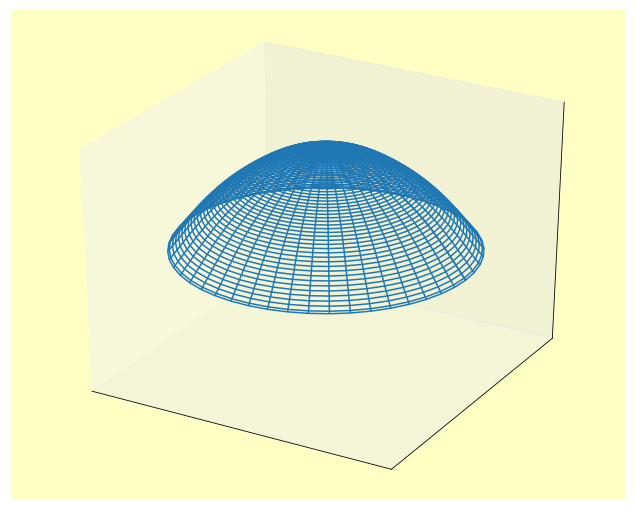

/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
fig = figure(figsize=[11,9])
ax = fig.add_subplot(111,projection='3d',axisbg='#FDFFC3')

def animate(n):
    T = zeros((X.shape)) + n
    grafico[0].remove()
    grafico[0] = ax.plot_wireframe(X,Y,psi(R,Ang,T))

grafico = [ax.plot_wireframe(X,Y,inicial(R,Ang))]

anim = animation.FuncAnimation(fig,animate,interval=40,frames=linspace(0,5*pi/2,100))

ax.set_xlim(-1.05,1.05)
ax.set_ylim(-1.05,1.05)
ax.set_zlim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
grid()
show()

anim.save('MembranaVibrante1.gif',writer='imagemagick')

Probemos ahora con la siguiente condición inicial

#### \begin{equation} f(\rho) = \frac{3}{4} \cos \left( \frac{7\pi}{a} \rho \right) \end{equation}

/home/fabianjp/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:380: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/home/fabianjp/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


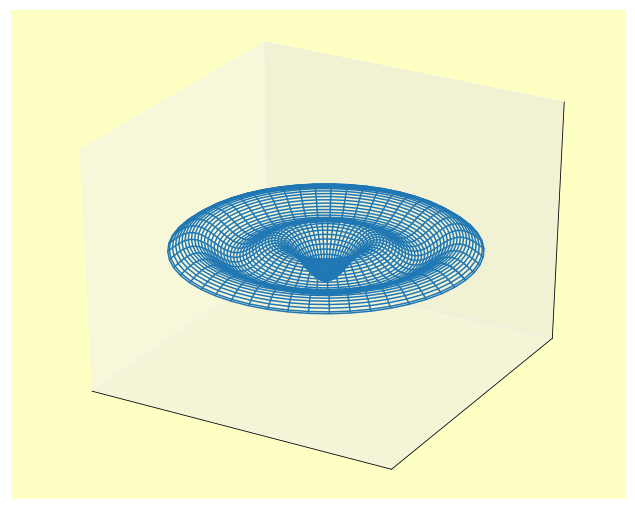

/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [8]:
#Definamos la condición inicial
def inicial(r,ang):
    return 0.75*cos((7*pi/a)*r)

#Determinemos los coeficientes
coef = zeros((2*M+1,N))
for m in range(-M,M+1):
    for n in range(1,N+1):
        const = (1/(pi*(a**2)*((jn(m+1,jn_zeros(m,n)[n-1])**2))))
        coef[m+M,n-1] = const*I(m,n)

#Hagamos la animación
fig = figure(figsize=[11,9])
ax = fig.add_subplot(111,projection='3d',axisbg='#FDFFC3')

def animate(n):
    T = zeros((X.shape)) + n
    grafico[0].remove()
    grafico[0] = ax.plot_wireframe(X,Y,psi(R,Ang,T))

grafico = [ax.plot_wireframe(X,Y,inicial(R,Ang))]

anim = animation.FuncAnimation(fig,animate,interval=60,frames=linspace(0,5*pi/2,100))

ax.set_xlim(-1.05,1.05)
ax.set_ylim(-1.05,1.05)
ax.set_zlim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
grid()
show()

anim.save('MembranaVibrante2.gif',writer='imagemagick')

Veamos otra condición inicial.

#### \begin{equation} f(\rho,\phi) = (\rho-a)(\rho+1.5)(\rho+0.7)(\rho-0.7)(\rho+1.2) \cos^2(\phi) \end{equation}

/home/fabianjp/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:380: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/home/fabianjp/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


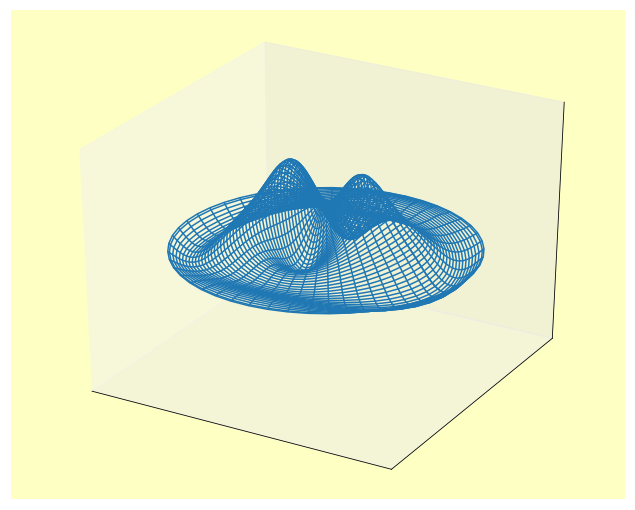

/home/fabianjp/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [10]:
#Definamos la condición inicial
def inicial(r,ang):
    return (r-a)*(r+1.5)*(r+0.7)*(r-0.7)*(r+1.2)*(cos(ang))**2

#Determinemos los coeficientes
coef = zeros((2*M+1,N))
for m in range(-M,M+1):
    for n in range(1,N+1):
        const = (1/(pi*(a**2)*((jn(m+1,jn_zeros(m,n)[n-1])**2))))
        coef[m+M,n-1] = const*I(m,n)

#Hagamos la animación
fig = figure(figsize=[11,9])
ax = fig.add_subplot(111,projection='3d',axisbg='#FDFFC3')

def animate(n):
    T = zeros((X.shape)) + n
    grafico[0].remove()
    grafico[0] = ax.plot_wireframe(X,Y,psi(R,Ang,T))

grafico = [ax.plot_wireframe(X,Y,inicial(R,Ang))]

anim = animation.FuncAnimation(fig,animate,interval=40,frames=linspace(0,5*pi/2,100))

ax.set_xlim(-1.05,1.05)
ax.set_ylim(-1.05,1.05)
ax.set_zlim(-1.2,1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
grid()
show()

anim.save('MembranaVibrante3.gif',writer='imagemagick')